In [49]:
# boilerplate cell for stuff that comes out of the box with R, probably
# copied from https://github.com/Azure/RNNForTimeSeriesForecasting, because I am new to this stuff
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
import scipy.stats as stats
import statsmodels.stats.api as sms
from glob import glob
from collections import UserDict
from IPython.display import Image, Markdown, display
from utils import Capturing
%matplotlib inline

# some kind soul ported a bunch of default R datasets (and more) into python, bless his soul
from pydataset import data as pdsd

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)

Original:
```R
help(sleep)
```

**Note**
There doesn't seem to be an easy way to get it formatted as nicely as it is in R. Oh well.

In [40]:
with Capturing() as output:
    pdsd("sleep",show_doc=True)
display(Markdown("\n".join(output)))

sleep

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Student's Sleep Data

### Description

Data which show the effect of two soporific drugs (increase in hours of sleep
compared to control) on 10 patients.

### Usage

    sleep

### Format

A data frame with 20 observations on 3 variables.

[, 1]

extra

numeric

increase in hours of sleep

[, 2]

group

factor

drug given

[, 3]

ID

factor

patient ID

### Details

The `group` variable name may be misleading about the data: They represent
measurements on 10 persons, not in groups.

### Source

Cushny, A. R. and Peebles, A. R. (1905) The action of optical isomers: II
hyoscines. _The Journal of Physiology_ **32**, 501–510.

Student (1908) The probable error of the mean. _Biometrika_, **6**, 20.

### References

Scheffé, Henry (1959) _The Analysis of Variance_. New York, NY: Wiley.

### Examples

    require(stats)
    ## Student's paired t-test
    with(sleep,
         t.test(extra[group == 1],
                extra[group == 2], paired = TRUE))
    ## The sleep *prolongations*
    sleep1 <- with(sleep, extra[group == 2] - extra[group == 1])
    summary(sleep1)
    stripchart(sleep1, method = "stack", xlab = "hours",
               main = "Sleep prolongation (n = 10)")
    boxplot(sleep1, horizontal = TRUE, add = TRUE,
            at = .6, pars = list(boxwex = 0.5, staplewex = 0.25))



Original:
```R
sleep
```

In [41]:
sleep = pdsd("sleep")
sleep

,extra,group,ID
1,0.70,1,1
2,-1.60,1,2
3,-0.20,1,3
4,-1.20,1,4
5,-0.10,1,5
6,3.40,1,6
7,3.70,1,7
8,0.80,1,8
9,0.00,1,9
10,2.00,1,10


Original:
```R
plot(extra~group, data=sleep, main = "Extra Sleep in Gossett Data by Group")
```

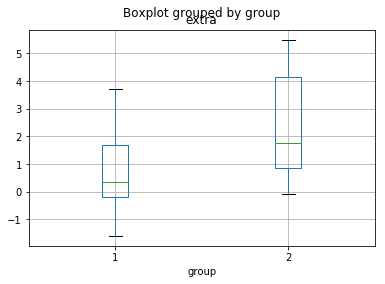

In [42]:
sleep.boxplot(column="extra",by="group")

Original:
```R
attach(sleep)
extra.1=extra[group==1]
extra.2=extra[group==2]
t.test(extra.1, extra.2, paired=TRUE, alternative="two.sided")
```

Original output:
```
data:  extra.1 and extra.2
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of the differences 
                  -1.58 
```

In [69]:
# calculation of t-statistic and p-value
extras = pd.DataFrame(np.array([sleep[sleep.group==1]['extra'],sleep[sleep.group==2]['extra']]).T, columns=['extra1','extra2'])
stats.ttest_rel(extras['extra1'],extras['extra2'])

Ttest_relResult(statistic=-4.062127683382037, pvalue=0.00283289019738427)

In [70]:
# calculation of mean of diffs
extras['diffs'] = extras['extra1'] - extras['extra2']
extras['diffs'].mean()

-1.58

In [79]:
# calculation of confidence interval with confidence level 95% for diffsm
sms.DescrStatsW(extras['diffs']).tconfint_mean(alpha=0.05)

(-2.4598857632547286, -0.7001142367452713)

Original:
```R
qqnorm(diffs, main= "Normal Probability Plot")
qqline(diffs)
```

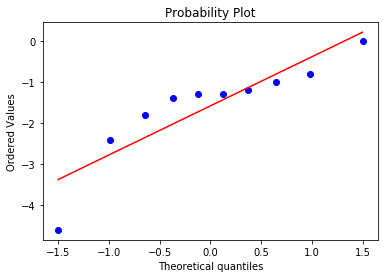

In [74]:
stats.probplot(extras['diffs'],plot=plt)
plt.show()

#### Comment
It's crazy how much R does for you behind the scenes as compared to Python. Look at how much I had to do to duplicate the results of `t.test(extra.1, extra.2, paired=TRUE, alternative="two.sided")`. Wonder what the tradeoff is?

#### TODO
There's some other stuff in the pdf I haven't ported. May look at it later.